# Classification of Potential Loan Customers

Table of Content:

1. Executive Summary

2. Overview

3. Methodology

4. Business Understanding

5. Data Understanding

    5.1 Importing Data 

    5.2 EDA (Exploratory Data Analysis)

        5.2.1 Basic EDA Visualization

        5.2.2 Target with Variables Visualization

        5.2.3 Target with Prominent Variables Visualization

        5.2.4 EDA Conclusion

6. Data Preparation

    6.1 Data Splitting

    6.2 Selecting Benchmark (Preprocessing)

        6.2.1 No Treatment

        6.2.2 SMOTE Balancing

        6.2.3 Random Over Sammpler Balancing

        6.2.4 Random Under Sampler Balancing

        6.2.5 Near Miss Balancing

    6.3 Preprocessing Conclusion

7. Modelling

    7.1 Before Hyperparameter Tuning

    7.2 After Hyperparameter tuning

    7.3 Modelling Selection Conclusion
    
    7.4 Feature Importance

## 1. Executive Summary

The purpose of this project is to give solution for Thera Bank to predict the probability for future Account Holders that might accept the Personal Loan offer based on Thera Bank Account Dataset to increase Revenue and decrease marketing campaign costs.

Using CRISP DM methodology, Classification model using Random Forest Classifier and balanced by Random Under Sampler after Hyperparameter Tuning with recall score  based on acquired dataset for Thera Bank to minimize the chances of offering loan to people who does not fit with the criteria based on.

The performance result showed it can get almost 100% of prediction accuracy after Hyperparameter tuning, but it does not by any means perfect as for other scores does not perform as perfect as recall score. This issues mainly caused by the dataset is too good.

The point of using recall score in performance metrics is to minimize False Negative Cases so the Marketing Department able to gain more info about why people with False Positive Cases decline the loan offer to create a better metrics for future campaign.

Based from Exploratory Data Analysis, there are few suggestion for Thera Bank to tailor their next Personal Loan campaign:

- Thera Bank might want to profile their current with the specific 'Income' 130k to 180k or 'CCAvg' of 2.5k to 5.8k to understand their reason to accept for loan so it can tailor suitable campaign for these specific people and offer them loan.

- Thera Bank might want to create a campaign that targeted couple who about to deliver their first child or currently having their first child. Based on the data, Family size of 3 have highest range of monthly credit card average spending. Thera Bank could offer child related benefits when this family size apply for loan.

- Thera Bank might want to create a Personal Loan program or benefit that could interest people who is pursuing their higher education as the range of people with higher amount of credit card monthly spending average increases. There is a possibility they use the personal loan to pay for their education fee.

- Thera Bank might want to look for more potential Account Holders with higher income to increase chances to apply for loan in the future.

## 2. Overview

This Project is part of the Purwadhika Data Science Bootcamp's final test to see the student's comprehension of their 4 months long Data Science Courses.

In this project, the student presents the application of machine learning knowledge from the Bootcamp Courses using "Personal Loan Classification" data set from kaggle to predict probability of account holder based from this dataset who would accept to take loan so the bank can gain more income through interest from said loans.

## 3. Methodology

There are various approach to present the machine learning problem. However, as this project is a part of implementation of Machine Learning knowledge based from the Bootcamp's curriculum, CRISP DM method is one methodology approach will be used as it was one that is taught throughout the courses and also used to hone all steps taught implemented.

CRISP-DM methodology stands for "Cross-industry standard process for data mining" and an open standard process model that describes common approaches used by data mining experts. It was first developed in 1996 and even though IBM had developed an updated process called ASUM-DM which stands for "Analytics Solutions Unified Method" in 2015, this methodology still able to hold as an international standard.

CRISP-DM consisted of 5 interconnected steps which are:
- Business Understanding
- Data Understanding
- Modelling
- Evaluation
- Deployment

Next, the problem definition will be explained in Business Understanding.

## 4. Business Understanding

Thera Bank has a growing customer base whose mostly depositors which considered as a liability customers since they do not generate as much revenue for the bank. As the bank gains revenue mostly from loan interests, the bank wants to explore their revenue from their personal loan customers. 

However, the bank first wants to predict the characteristics of their suitable target of loan amongst their Account Holders who might be interested to apply loan to create a better campaign with minimal budget.

 To formulate the machine learning business formulation there are 5 aspects needed to be covered:

- The Problem   : The marketing department wants to build a better campaign that could make the potential customers apply more loan. This will increase the chance of conversion from Account Holders to loan appliers while at the same time reduce the cost of the campaign.

- Data          : Dataset from the bank's Account Holders.

- ML Objective  : Find the determinant variables that could help Bank predict their potential loaners using current dataset of Account Holders.

- Action        : Create a prediction model for Thera Bank so they can use it as a tool whether or not to offer to potential loaners.

- Value         : Bank gains more revenue from loan interests, while reducing marketing costs during campaign since marketing department will only target who fits criteria.

After finally able to grasp the situation and the goal of this project, the next logical step is to understand the data we have.

## 5. Data Understanding

After knowing and clarifying the purpose of our project, Exploratory Data Analysis or EDA to gain further insights what is in the dataset.

### 5.1 Data

In [27]:
# Basic
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

# Data Preparation
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
import category_encoders as ce
from imblearn.pipeline import Pipeline # as we are going to implement imbalance data, better use imblearn library. Otherwise just use simple sklearn.

# Modelling

from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, RandomizedSearchCV
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler, NearMiss

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import plot_roc_curve
from sklearn.metrics import classification_report, recall_score, f1_score

import warnings

warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

# Benchmarking

from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold

In [6]:
# As the data provided only in xlsx, we need to convert it into csv first

data_xls = pd.read_excel('Bank_Personal_Loan_Modelling.xlsx', 'Data', index_col=None)
data_xls.to_csv('BankData.csv', encoding='utf-8', index=False)

In [13]:
loan = pd.read_csv('BankData.csv')
loan.head()

ID  Age  Experience  Income  ZIP Code  Family  CCAvg  Education  Mortgage  \
0   1   25           1      49     91107       4    1.6          1         0   
1   2   45          19      34     90089       3    1.5          1         0   
2   3   39          15      11     94720       1    1.0          1         0   
3   4   35           9     100     94112       1    2.7          2         0   
4   5   35           8      45     91330       4    1.0          2         0   

   Personal Loan  Securities Account  CD Account  Online  CreditCard  
0              0                   1           0       0           0  
1              0                   1           0       0           0  
2              0                   0           0       0           0  
3              0                   0           0       0           0  
4              0                   0           0       0           1

In [13]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


### Context of the data

- ID	            : Customer ID
- Age	            : Customer's age in completed years
- Experience	    : Number years of professional experience
- Income	        : Annual income of the customer ($000)
- ZIPCode	        : Home Address ZIP code.
- Family	        : Family size of the customer
- CCAvg	        : Avg. spending on credit cards per month ($000)
- Education	    : Education Level. 1: Undergrad; 2: Graduate; 3: Advanced/Professional
- Mortgage	    : Value of house mortgage if any. ($000)
- Personal Loan	: Did this customer accept the personal loan offered in the last campaign? 
- Securities Account	: Does the customer have a securities account with the bank?
- CD Account	        : Does the customer have a certificate of deposit (CD) account with the bank?
- Online	            : Does the customer use internet banking facilities?
- CreditCard	        : Does the customer use a credit card issued by UniversalBank?

>* from Personal Loans columns until CreditCard columns, it seems all of its input had been encoded; perhaps using onehot encoding method; as the content consists of 0 or 1 where 0 means False and 1 means True in terms of Boolean.

> ### 5.1 Summary:

So after the data has been able to be accessed in jupyter notebook and given a better context from each of its variable. We have 5000 account holders from this dataset and our next step is to explore the data to have a better understanding of data characteristics through visualization to select proper target and perhaps correlation between features. 

Not to mention to check the assumption about the already encoded variables in the dataset.

### 5.2 Exploratory Data Analysis (EDA)

In this step we want to understand the data through testing assumptions using common sense before we are able to narrate and making sense of our dataset.

We can categorize the data based on its characteristics, first and foremost:

Nominal Variables:
- 'ID'
- 'ZIP Code'

Interval Variables:
- 'Age'
- 'Experience'
- 'Income'
- 'CCAvg'
- 'Mortgage'

Ordinal Variables:
- 'Family'
- 'Education'

Binary Variables:
- 'Personal Loan'
- 'Securities Account'
- 'CD Account'
- 'Online'
- 'CreditCard'

EDA will dissect this data with visualization through 3 steps:

- Step 1: Visualize the group 1 and 2 with simple visualization using distribution plot / countplot to get a general picture of the data, and create some hypothesis based on the findings.

- Step 2: Visualize other variables with the target variable.

- Step 3: Visualize other variables with variables which seems has high correlation with the target.

- Step 4: Create a summary and proposal based from EDA Findings.

### 5.2.1 Basic / Quick EDA

The action will be implemented for each data type and then followed by quick hindsight, but first, we start with describe just to see if there are odd data variables.

In [10]:
loan.describe().transpose()

count          mean          std     min       25%  \
ID                  5000.0   2500.500000  1443.520003     1.0   1250.75   
Age                 5000.0     45.338400    11.463166    23.0     35.00   
Experience          5000.0     20.104600    11.467954    -3.0     10.00   
Income              5000.0     73.774200    46.033729     8.0     39.00   
ZIP Code            5000.0  93152.503000  2121.852197  9307.0  91911.00   
Family              5000.0      2.396400     1.147663     1.0      1.00   
CCAvg               5000.0      1.937913     1.747666     0.0      0.70   
Education           5000.0      1.881000     0.839869     1.0      1.00   
Mortgage            5000.0     56.498800   101.713802     0.0      0.00   
Personal Loan       5000.0      0.096000     0.294621     0.0      0.00   
Securities Account  5000.0      0.104400     0.305809     0.0      0.00   
CD Account          5000.0      0.060400     0.238250     0.0      0.00   
Online              5000.0      0.596800     0.490589     0.0      0.00   
CreditCard          5000.0      0.294000     0.455637     0.0      0.00   

                        50%       75%      max  
ID                   2500.5   3750.25   5000.0  
Age                    45.0     55.00     67.0  
Experience             20.0     30.00     43.0  
Income                 64.0     98.00    224.0  
ZIP Code            93437.0  94608.00  96651.0  
Family                  2.0      3.00      4.0  
CCAvg                   1.5      2.50     10.0  
Education               2.0      3.00      3.0  
Mortgage                0.0    101.00    635.0  
Personal Loan           0.0      0.00      1.0  
Securities Account      0.0      0.00      1.0  
CD Account              0.0      0.00      1.0  
Online                  1.0      1.00      1.0  
CreditCard              0.0      1.00      1.0

>### Nominal Variables

As 'ID' will not be used in this EDA as it does not provide particular information or pattern. It would not bring any kind correlation if the number of 'ID' goes up or down in this data as there is no correlation between loan dataset and 'ID'. Thus this variable will be changed to 'str' to prevent any correlation with other variables

In [14]:
loan['ID'] = loan['ID'].astype('str')

In [50]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   object 
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(12), object(1)
memory usage: 547.0+ KB


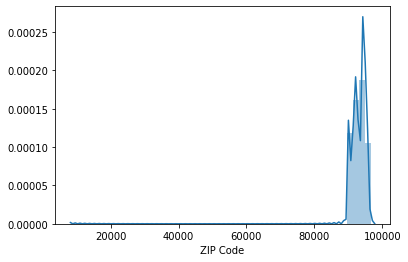

In [33]:
sns.distplot(loan['ZIP Code'])

> ### Quick Hindsight of Nominal Variables

- A tight density means that the dataset shows that most of its account holders registered residence are in area that is not so far from each account holders.

>### Interval Variables

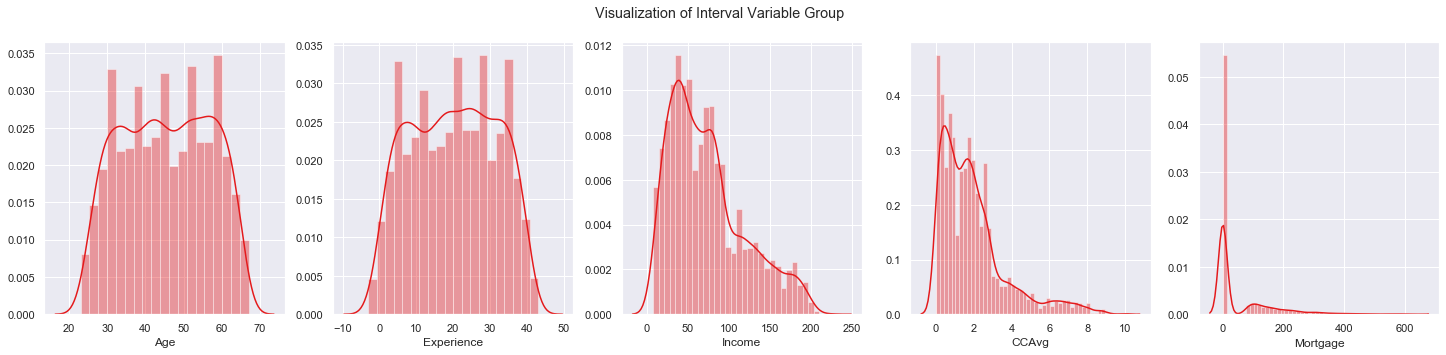

In [24]:
fig, axes = plt.subplots(1, 5, figsize=(25,5))

fig.suptitle('Visualization of Interval Variable Group')

sns.distplot(loan['Age'], ax=axes[0])
sns.distplot(loan['Experience'], ax=axes[1])
sns.distplot(loan['Income'], ax=axes[2])
sns.distplot(loan['CCAvg'],ax=axes[3])
sns.distplot(loan['Mortgage'], ax=axes[4])

> Quick Hindsight of Interval Visualization:

- In'Experience' plot and the describe dataframe, there is rather odd data as it was shown a minus experience? What is that supposed to mean? Maybe perhaps wrong input? We need to look deeper for it (!)

> ### Data Cleaning in 'Experience'

In [35]:
# let's see how many below zero data we have
loan.loc[loan['Experience'] < 0, 'Experience'].value_counts()

-1    33
-2    15
-3     4
Name: Experience, dtype: int64

In [15]:
# since this data means that they have no experience at all, we will change the data into 0

loan.loc[loan['Experience'] < 0, 'Experience'] = 0
loan['Experience'].describe()

count    5000.000000
mean       20.119600
std        11.440484
min         0.000000
25%        10.000000
50%        20.000000
75%        30.000000
max        43.000000
Name: Experience, dtype: float64

In [ ]:
The data in variable 'Experience' now has been cleaned and no minus.

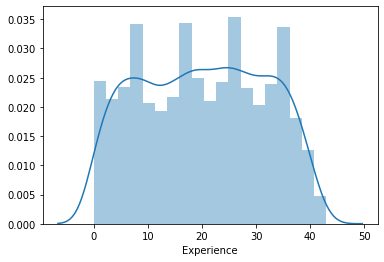

In [40]:
sns.distplot(loan['Experience'])

> ### Ordinal Variables

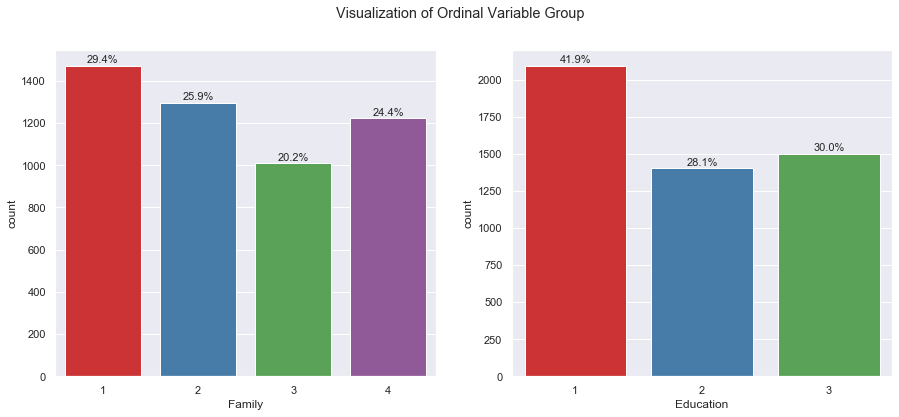

In [22]:
fig, axes = plt.subplots(1, 2, figsize=(15,6))
sns.set(palette= 'Set1')

fig.suptitle('Visualization of Ordinal Variable Group')

ax_fa = sns.countplot(ax=axes[0], x=loan['Family'])
ax_ed = sns.countplot(ax=axes[1], x=loan['Education'])

total = len(loan)

for i in ax_fa.patches:
    percentage = f'{100 * i.get_height() / total:.1f}%\n' #if you don't want the number to be precentage, only left out i.get_height()
    xpos = i.get_x() + i.get_width() / 2
    ypos = i.get_height()
    ax_fa.annotate(percentage, (xpos, ypos), ha='center', va='center', fontsize = 11)
    
for i in ax_ed.patches:
    percentage2 = f'{100 * i.get_height() / total:.1f}%\n'
    xpos2 = i.get_x() + i.get_width() / 2
    ypos2 = i.get_height()
    ax_ed.annotate(percentage2, (xpos2, ypos2), ha='center', va='center', fontsize = 11)

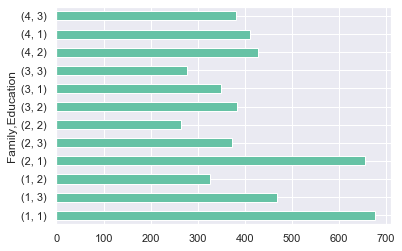

In [236]:
loan.groupby('Family')['Education'].value_counts().plot(kind='barh')

> ### Binary Variables

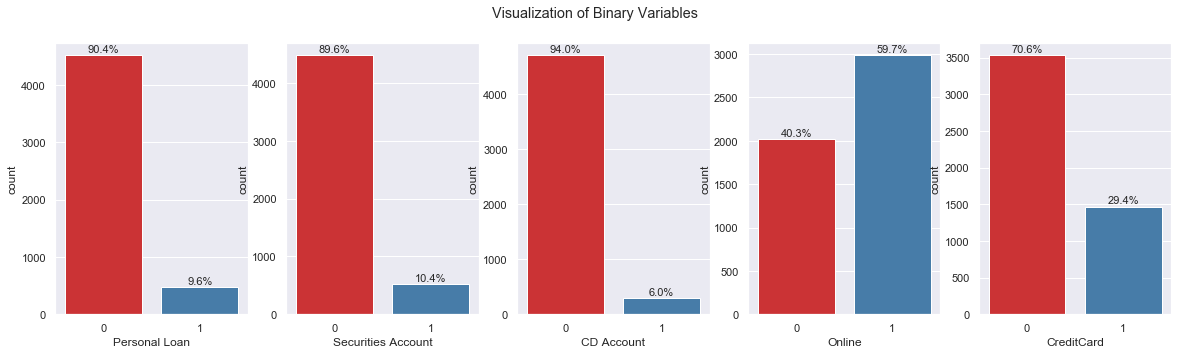

In [26]:
fig, axes = plt.subplots(1, 5, figsize=(20,5))
sns.set(palette= 'Set1')

fig.suptitle('Visualization of Binary Variables')

ax_pl = sns.countplot(ax=axes[0], x=loan['Personal Loan'])
ax_sa = sns.countplot(ax=axes[1], x=loan['Securities Account'])
ax_cd = sns.countplot(ax=axes[2], x=loan['CD Account'])
ax_ol = sns.countplot(ax=axes[3], x=loan['Online'])
ax_cc = sns.countplot(ax=axes[4], x=loan['CreditCard'])

total = len(loan)

for i in ax_sa.patches:
    percentage = f'{100 * i.get_height() / total:.1f}%\n'
    xpos = i.get_x() + i.get_width() / 2
    ypos = i.get_height()
    ax_sa.annotate(percentage, (xpos, ypos), ha='center', va='center', fontsize = 11)
    
for i in ax_cd.patches:
    percentage2 = f'{100 * i.get_height() / total:.1f}%\n'
    xpos2 = i.get_x() + i.get_width() / 2
    ypos2 = i.get_height()
    ax_cd.annotate(percentage2, (xpos2, ypos2), ha='center', va='center', fontsize = 11)

for i in ax_ol.patches:
    percentage3 = f'{100 * i.get_height() / total:.1f}%\n'
    xpos3 = i.get_x() + i.get_width() / 2
    ypos3 = i.get_height()
    ax_ol.annotate(percentage3, (xpos3, ypos3), ha='center', va='center', fontsize = 11)

for i in ax_cc.patches:
    percentage4 = f'{100 * i.get_height() / total:.1f}%\n'
    xpos4 = i.get_x() + i.get_width() / 2
    ypos4 = i.get_height()
    ax_cc.annotate(percentage4, (xpos4, ypos4), ha='center', va='center', fontsize = 11)

for i in ax_pl.patches:
    percentage5 = f'{100 * i.get_height() / total:.1f}%\n'
    xpos5 = i.get_x() + i.get_width() / 2
    ypos5 = i.get_height()
    ax_pl.annotate(percentage5, (xpos5, ypos5), ha='center', va='center', fontsize = 11)

### 5.2.1 Basic EDA Insights Hypothesis Summary

- The account holder of this datasets resides in either one province / area close to each other.

- Thera Bank seems to have targeted a wide demographic, rather than specific demographic as it can be seen from the distribution of age and work experience of its account holders.

- Account holders dominantly comprised of single people or a couple with no children with undergrads as most common highest education.

- The feature Thera Bank offer also seems appealing for people with Credit Card monthly average spending from 100 to 2000.

- The only feature that is popularly used by Thera Bank account holders is only their online banking account, while Personal Loan, Deposits and Securities account are rather unpopular. There are many causes of this, perhaps the offer was not interesting enough or perhaps account holders does not even aware of these offers.

- 'Income' and 'CCAvg' could be two most important factor to profile the account holders as it reflects income and spending. On the step 2 of EDA, we will see the effect of these 2 variables against all other variables except 'ID' to create even more robust hypothesis about this data.

### 5.2.2 Target Visualization

After we have seen the data for each variables, now we can start by looking at other variables with the target ('Personal Loan') visualization that might be interesting for Thera Bank.

We will visualize it using the same data group like above.

> ### Personal Loan / Nominal Variables

For this one we got to make scatter plot to see group of ZIP Code that apply has personal loan as based on assumption the higher the income, the more chances one will more likely to apply personal loan since they would have more capability to pay it back.

As for ZIP Code we put the ZIP Code above 80000 as most of the ZIP Code have value around that number

In [52]:
loan_zip = loan[loan['ZIP Code'] > 80000]

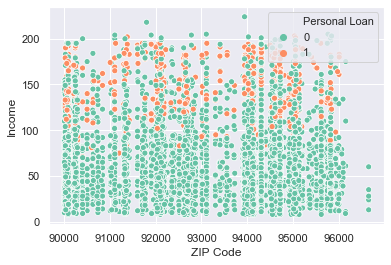

In [37]:
sns.scatterplot(x='ZIP Code', data= loan_zip, y= 'Income', hue='Personal Loan')
sns.set(palette= 'Set2')

> ### Personal Loan / Interval Variables

<AxesSubplot:xlabel='Mortgage', ylabel='Density'>

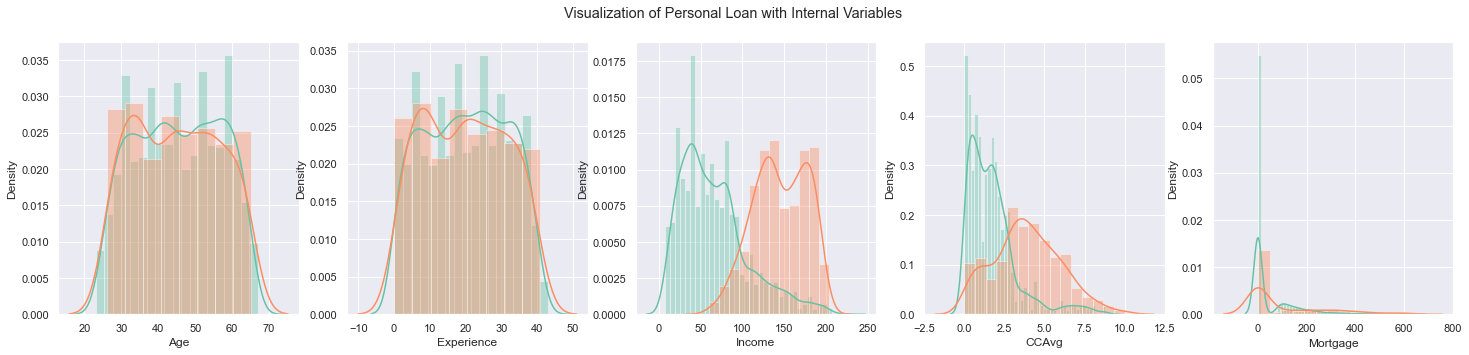

In [50]:
fig, axes = plt.subplots(1, 5, figsize=(25,5))
sns.set(palette= 'Set2')

fig.suptitle('Visualization of Personal Loan with Internal Variables')

sns.distplot(loan[loan['Personal Loan']==0]['Age'], ax=axes[0])
sns.distplot(loan[loan['Personal Loan']==1]['Age'], ax=axes[0], axlabel='Age')

sns.distplot(loan[loan['Personal Loan']==0]['Experience'], ax=axes[1])
sns.distplot(loan[loan['Personal Loan']==1]['Experience'], ax=axes[1], axlabel='Experience')

sns.distplot(loan[loan['Personal Loan']==0]['Income'], ax=axes[2])
sns.distplot(loan[loan['Personal Loan']==1]['Income'], ax=axes[2], axlabel='Income')

sns.distplot(loan[loan['Personal Loan']==0]['CCAvg'], ax=axes[3])
sns.distplot(loan[loan['Personal Loan']==1]['CCAvg'], ax=axes[3], axlabel='CCAvg')

sns.distplot(loan[loan['Personal Loan']==0]['Mortgage'], ax=axes[4])
sns.distplot(loan[loan['Personal Loan']==1]['Mortgage'], ax=axes[4], axlabel='Mortgage')

> ### Personal Loan / Ordinal Variables

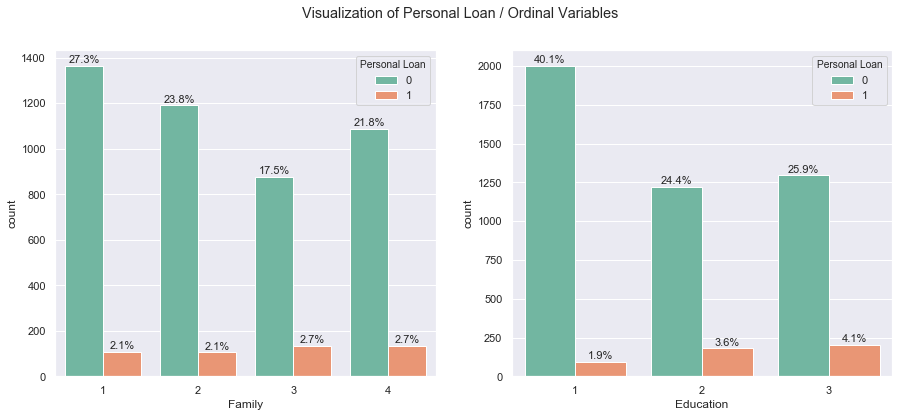

In [19]:
fig, axes = plt.subplots(1, 2, figsize=(15,6))
sns.set(palette= 'Set2')

fig.suptitle('Visualization of Personal Loan / Ordinal Variables')

ax_family = sns.countplot(ax=axes[0], x=loan['Family'], hue=loan['Personal Loan'])
ax_education = sns.countplot(ax=axes[1], x=loan['Education'], hue=loan['Personal Loan'])

total = len(loan)

for i in ax_family.patches:
    percentage = f'{100 * i.get_height() / total:.1f}%\n'
    xpos = i.get_x() + i.get_width() / 2
    ypos = i.get_height()
    ax_family.annotate(percentage, (xpos, ypos), ha='center', va='center', fontsize = 11)
    
for i in ax_education.patches:
    percentage2 = f'{100 * i.get_height() / total:.1f}%\n'
    xpos2 = i.get_x() + i.get_width() / 2
    ypos2 = i.get_height()
    ax_education.annotate(percentage2, (xpos2, ypos2), ha='center', va='center', fontsize = 11)


> ### Personal Loan / Binary Variables

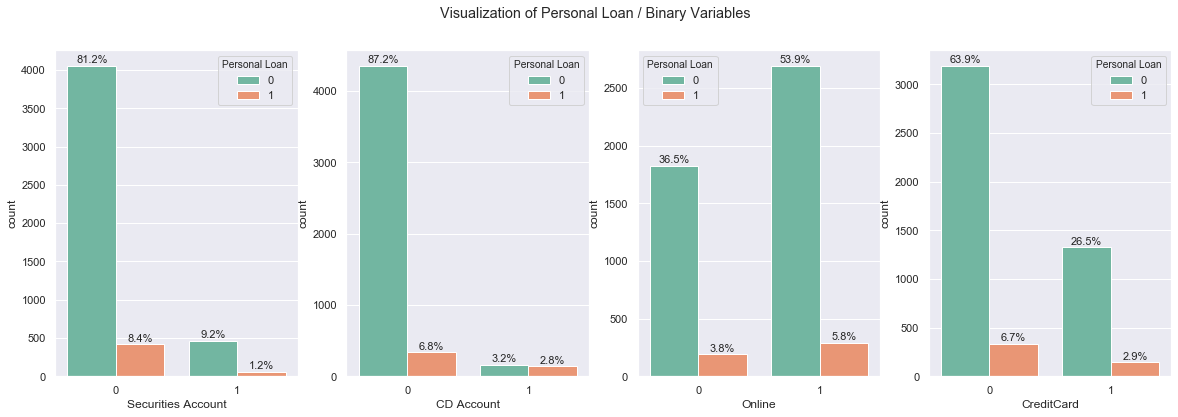

In [27]:
fig, axes = plt.subplots(1, 4, figsize=(20,6))
sns.set(palette= 'Set2')

fig.suptitle('Visualization of Personal Loan / Binary Variables')

ax_sa = sns.countplot(ax=axes[0], x=loan['Securities Account'], hue=loan['Personal Loan'])
ax_cd = sns.countplot(ax=axes[1], x=loan['CD Account'], hue=loan['Personal Loan'])
ax_ol = sns.countplot(ax=axes[2], x=loan['Online'], hue=loan['Personal Loan'])
ax_cc = sns.countplot(ax=axes[3], x=loan['CreditCard'], hue=loan['Personal Loan'])

total = len(loan)

for i in ax_sa.patches:
    percentage = f'{100 * i.get_height() / total:.1f}%\n'
    xpos = i.get_x() + i.get_width() / 2
    ypos = i.get_height()
    ax_sa.annotate(percentage, (xpos, ypos), ha='center', va='center', fontsize = 11)
    
for i in ax_cd.patches:
    percentage2 = f'{100 * i.get_height() / total:.1f}%\n'
    xpos2 = i.get_x() + i.get_width() / 2
    ypos2 = i.get_height()
    ax_cd.annotate(percentage2, (xpos2, ypos2), ha='center', va='center', fontsize = 11)

for i in ax_ol.patches:
    percentage3 = f'{100 * i.get_height() / total:.1f}%\n'
    xpos3 = i.get_x() + i.get_width() / 2
    ypos3 = i.get_height()
    ax_ol.annotate(percentage3, (xpos3, ypos3), ha='center', va='center', fontsize = 11)

for i in ax_cc.patches:
    percentage4 = f'{100 * i.get_height() / total:.1f}%\n'
    xpos4 = i.get_x() + i.get_width() / 2
    ypos4 = i.get_height()
    ax_cc.annotate(percentage4, (xpos4, ypos4), ha='center', va='center', fontsize = 11)

> Looking through Correlation

In [24]:
loan.corr('spearman')['Personal Loan'].sort_values(ascending=False)

Personal Loan         1.000000
Income                0.430739
CD Account            0.316355
CCAvg                 0.313957
Education             0.139492
Mortgage              0.063294
Family                0.061757
Securities Account    0.021954
Online                0.006278
CreditCard            0.002802
ZIP Code             -0.000175
Experience           -0.007991
Age                  -0.008151
Name: Personal Loan, dtype: float64

>* ### Target with variables Insight Summary

From this visualization and correlation table, Thera Bank should have offer personal loan to people who are among these criteria:

>* They have 'Income' of more than 90k.
>* They have 'CCAvg' of more than 3k.
>* They have Certificate of Deposit or 'CD Account'.
>* The higher the education level, the more likely they apply for Personal Loan even though it only effect slightly.

Other than that, it was rather hard to see which variables that has strong effect with 'Personal Loan'. Knowing from the most distinct variables: 'Income' and "CCAvg", we can go to explore the data even deeper with target variables as hue.

### 5.2.3 Target with Prominent Variables

>* Interval Variables with 'Income' and 'Personal Loan' as hue

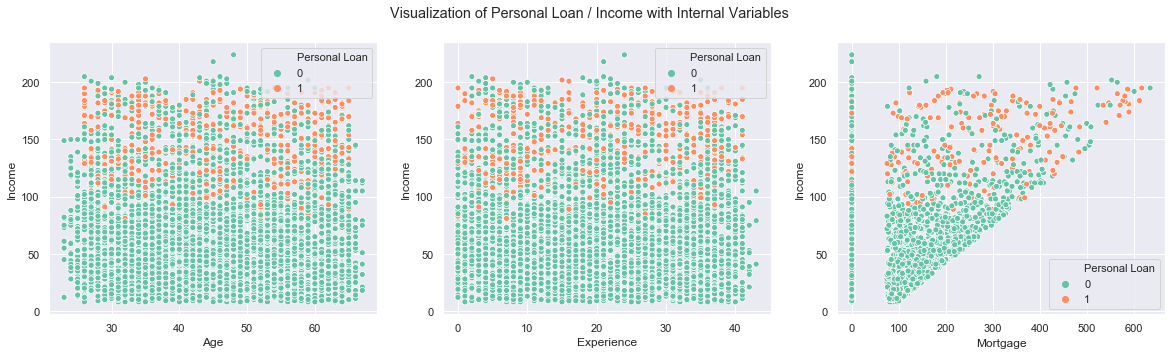

In [14]:
fig, axes = plt.subplots(1, 3, figsize=(20,5))
sns.set(palette= 'Set2')

fig.suptitle('Visualization of Personal Loan / Income with Internal Variables')

sns.scatterplot(ax=axes[0], x=loan["Age"], y=loan["Income"], hue=loan['Personal Loan'])
sns.scatterplot(ax=axes[1], x=loan["Experience"], y=loan["Income"], hue=loan['Personal Loan'])
sns.scatterplot(ax=axes[2], x=loan["Mortgage"], y=loan["Income"], hue=loan['Personal Loan'])

> Key Takeaways

- What we know there is not much specific patterns in terms of Age, Experience, Mortgage except the known facts that People with higher than 90k Income would most likely to apply Personal Loan.
- There are a lot of people who does not apply for mortgage. Even f they do, Most people with Income 10k - 100k tend to have mortgage mostl range 90k - 330k

>* Interval Variables with 'CCAvg' and 'Personal Loan' as hue

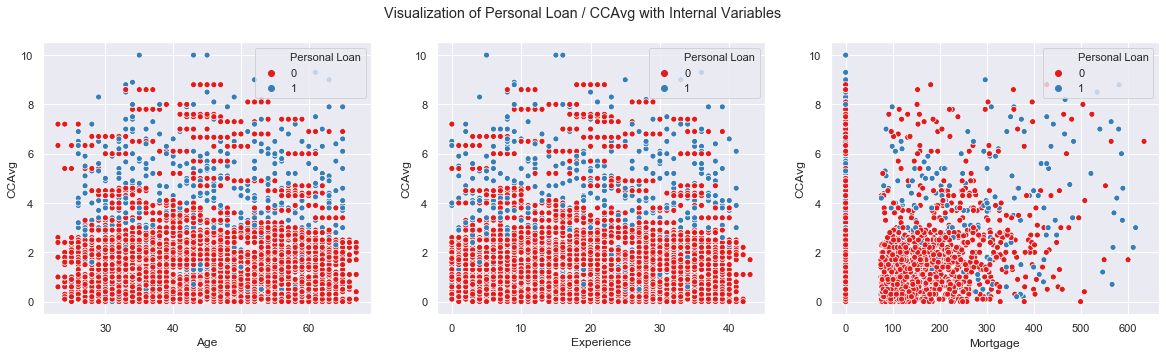

In [35]:
fig, axes = plt.subplots(1, 3, figsize=(20,5))
sns.set(palette= 'Set1')

fig.suptitle('Visualization of Personal Loan / CCAvg with Internal Variables')

sns.scatterplot(ax=axes[0], x=loan["Age"], y=loan["CCAvg"], hue=loan['Personal Loan'])
sns.scatterplot(ax=axes[1], x=loan["Experience"], y=loan["CCAvg"], hue=loan['Personal Loan'])
sns.scatterplot(ax=axes[2], x=loan["Mortgage"], y=loan["CCAvg"], hue=loan['Personal Loan'])

> Key Takeaways

- Same with Income, there is not much specific patterns in terms of Age, Experience, Mortgage except the known facts that People with higher than 3k Monthly Credit Card Aerage would most likely to apply Personal Loan.
- The highest density in mortgage scatterplot exists between 90k - 280k with spending ranging from 0-3k.

>* Ordinal Variables with 'Income' and 'Personal Loan' as hue

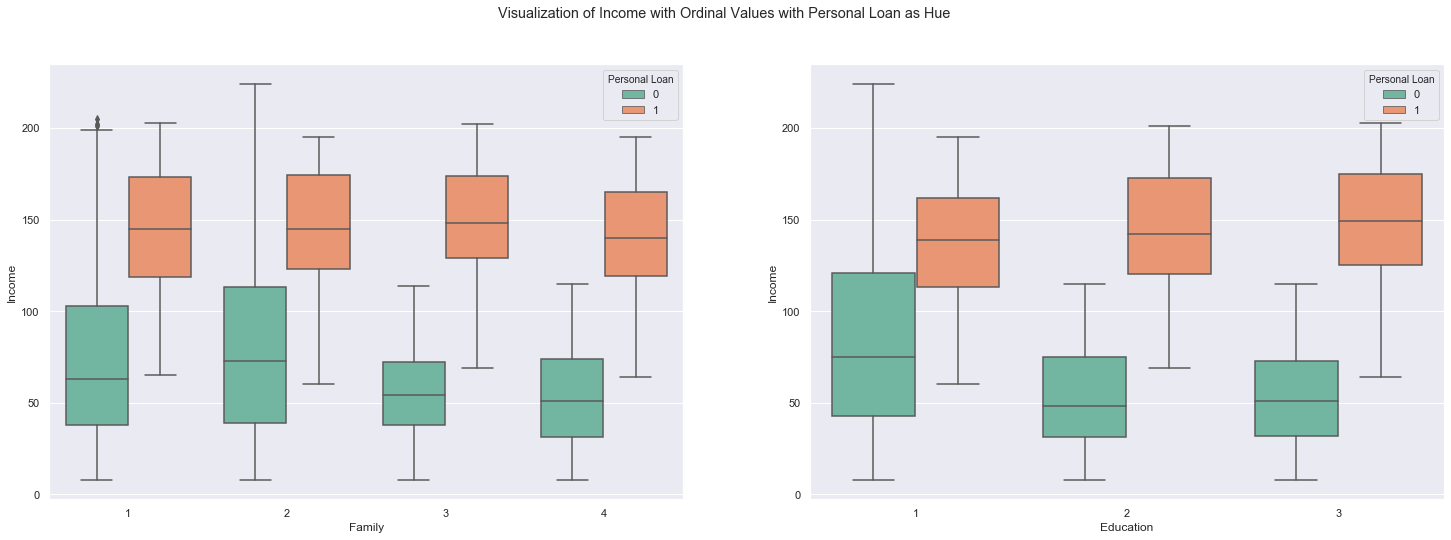

In [33]:
fig, axes = plt.subplots(1, 2, figsize=(25, 8))
sns.set(palette= 'Set2')

fig.suptitle('Visualization of Income with Ordinal Values with Personal Loan as Hue')

sns.boxplot(ax=axes[0], data=loan, x='Family', y='Income', hue='Personal Loan')
sns.boxplot(ax=axes[1], data=loan, x='Education', y='Income', hue='Personal Loan')

> Key Takeaways

- Now it can be seen clearly based on the Ordinal Variables, People regardless of their family size would accept personal loan if they have their income ranging from 130k - 180k.
- The Same Pattern and number goes well regardless of their education. 

>* Ordinal Variables with 'CCAvg' and 'Personal Loan' as hue

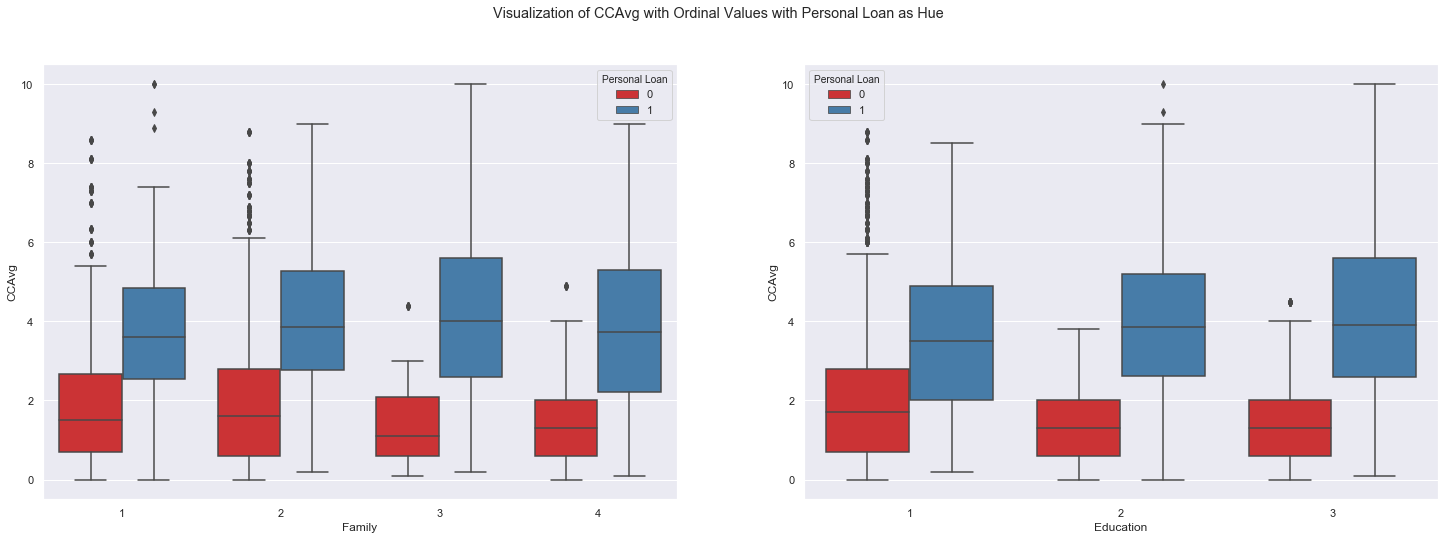

In [34]:
fig, axes = plt.subplots(1, 2, figsize=(25, 8))
sns.set(palette= 'Set1')

fig.suptitle('Visualization of CCAvg with Ordinal Values with Personal Loan as Hue')

sns.boxplot(ax=axes[0], data=loan, x='Family', y='CCAvg', hue='Personal Loan')
sns.boxplot(ax=axes[1], data=loan, x='Education', y='CCAvg', hue='Personal Loan')

>* Key Takeaways

- Turns out there is also a pattern when it comes to Credit Card Monthly Average. Despite the size of their famly size or Education level, people with the range of 2.5k to 5.8k, Credit Card Monthly spending average would more likely to accept the personal loan.

- Based on Family alone, Family with size of 3 have the highest range of loan accepter. This could be because they have a child, which could be their firstborn, makes them to accepting loan more.

- While on education level, the higher the education level, the higher range and average of people accepting the loan. This could mean in pursue of their higher education, they use personal loan to pay for their education fee.

### 5.2.4 EDA Summary

From this visualization and correlation table, Thera Bank should have offer personal loan to people who are among these criteria:

>* Thera Bank might want to profile their current with the specific 'Income' 140k to 150k or 'CCAvg' of 3.7k to 4.7k to understand their reason to accept for loan so it can tailor suitable campaign for these specific people and offer them loan.

>* Thera Bank might want to create a campaign that targeted couple who about to deliver their first child or currently having their first child. Based on the data, Family size of 3 have highest range of monthly credit card average spending. Thera Bank could offer child related benefits when this family size apply for loan

>* Thera Bank might want to create a Personal Loan program or benefit that could interest people who is pursuing their higher education.

>* Considering Thera Bank would expand as well, it is highly advisable to gain richer Account Holders with Annual Income more than 100k.

Marketing Dept might use this insight to filter their Account Holders and selecting from these critirias, but this information alone is not enough to predict if someone is going to apply for 'Personal Loan' or not. We need to prepare a model to predict it using machine learning.

## 6. Data Preparation

In this step, we are going to prepare the data in each variables so it can be processed by machine learning.

Here is the order of Data Preparation:
- Data Splitting
- Encoding (we will encode: ZIP Code with binary encoding as it has many variation of nominal variables but we need to change it to string first)

Other variables does not need to be encoded as it has pretty much left ready to be processed for machine learning.

In [16]:
loan['ZIP Code'] = loan['ZIP Code'].astype('str')

In [17]:
transformer = ColumnTransformer([
    ('binary encoder', ce.BinaryEncoder(),['ZIP Code']),
], remainder='passthrough')

### 6.1 Data Splitting

First we need to see the balance of the target data.

In [8]:
loan['Personal Loan'].value_counts()/loan['Personal Loan'].shape[0]*100

0    90.4
1     9.6
Name: Personal Loan, dtype: float64

As this the target data is highly imbalance, we need to import libraries to handle with the imbalanceness of classification target data.

> Feature Selection

Before splitting we need to see the correlation of each variables to see which one is suitable to be put in data splitting. We use spearman correlation method as most of the variables are mostly not in normal distribution.

In [60]:
loan.corr('spearman').style.background_gradient(cmap='coolwarm')

Based on the correlation above using spearman as most of the data are not normally distributed, there is a high correlation between age and experience. This could lead to multicollinearity, thus we need to drop one of them in new variable.

Between Age or Experience, we better drop Age and let us see the difference of correlation compared to other variables. The main argument is, Bank should care about how much years the account holders work instead of how old they are.

Also, it seems even though 'ID' has been changed to 'str', machine learning still look through that variable even though we did not intend to make it as a target. thus we need to drop it as well.

In [18]:
loanD=loan.drop(columns=['Age','ID'],axis=1)

In [189]:
loanD.corr('spearman').style.background_gradient(cmap='coolwarm')

In [102]:
# using spearman seems does not change the overall correlation against each other, but it should be done to prevent multicollinearity.

loanD.corr('spearman')['Personal Loan'].sort_values()

Experience           -0.007991
CreditCard            0.002802
Online                0.006278
Securities Account    0.021954
Family                0.061757
Mortgage              0.063294
Education             0.139492
CCAvg                 0.313957
CD Account            0.316355
Income                0.430739
Personal Loan         1.000000
Name: Personal Loan, dtype: float64

In [19]:
X = loanD.drop(columns=['Personal Loan'], axis=1)
y = loanD['Personal Loan']

In [20]:
X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    stratify = y, # we use stratify after knowing the target data is imbalance
    test_size = 0.2, 
    random_state = 2020)

In [105]:
transformer.fit_transform(X_train)
transformer.get_feature_names()

['binary encoder__ZIP Code_0',
 'binary encoder__ZIP Code_1',
 'binary encoder__ZIP Code_2',
 'binary encoder__ZIP Code_3',
 'binary encoder__ZIP Code_4',
 'binary encoder__ZIP Code_5',
 'binary encoder__ZIP Code_6',
 'binary encoder__ZIP Code_7',
 'binary encoder__ZIP Code_8',
 'binary encoder__ZIP Code_9',
 'Experience',
 'Income',
 'Family',
 'CCAvg',
 'Education',
 'Mortgage',
 'Securities Account',
 'CD Account',
 'Online',
 'CreditCard']

### 6.2 Selecting Benchmark

Here we import the relevant libraries with our cases:

- Since our target data is imbalances, we need to apply balancing in our model.

- And for scoring, we want to minimize the chances model offering loan to wrong people so we will use recall scoring as our performance metrics. The main reason this model only use the recall is because Thera Bank only wants to offer the loan to people who fit the criterias, thus we need to minimize the False Negative aspects while letting the False Positive. 

- When people who are supposed to be accepting loan but actually declining that offers, this people should be persuaded or to be understood by sales department to find perhaps a better factors that might give clearer insight on why people would want to apply loan.

- As we want to apply this model with the assumption the bank will be using the same parameter and variable to predict upcoming account holders. If the bank then decides to update their parameter and variables, new model should be revised and updated.

- Upcoming dashboard model should show the percentage of probability someone would accept the loan or not instead of yes or no.

> ### 6.2.1 No Treatment

In [36]:
models=[
    ['Log Regression', LogisticRegression()],
    ['Decision Tree', DecisionTreeClassifier()],
    ['Random Forest', RandomForestClassifier()],
    ['KNeighbours', KNeighborsClassifier()]
]

In [38]:
def evaluate(models):
    model_name=[]
    recall_score=[]
    recall_std=[]

    for name,model in models:
        estimator=Pipeline([('preprocess',transformer),('model',model)])

        skfold= StratifiedKFold(n_splits=5)

        model_name.append(name)
        recall_score.append(cross_val_score(estimator, X_train, y_train, cv=skfold, scoring='recall').mean())
        recall_std.append(cross_val_score(estimator, X_train, y_train, cv=skfold, scoring='recall').std())

    return pd.DataFrame({
        'model': model_name,
        'recall_score': recall_score,
        'recall_std': recall_std
        })

In [37]:
evaluate(models)

model  recall_score  recall_std
0  Log Regression      0.541695    0.063060
1   Decision Tree      0.903794    0.040582
2   Random Forest      0.802256    0.044866
3     KNeighbours      0.361962    0.041205

In [ ]:
Based on the benchmark function, Decision Tree Prevails.

> ### 6.2.2 SMOTE Balancing

In [39]:
model_1 = LogisticRegression() # logreg
model_2 = KNeighborsClassifier() # KNN
model_3 = DecisionTreeClassifier() # DT
model_4 = RandomForestClassifier() # RF
skfold = StratifiedKFold(n_splits = 5)
over = SMOTE()

models = [model_1, model_2, model_3, model_4]
CV_score_mean = []
CV_score_std = []

for i in models:
    estimator = Pipeline([('transformer', transformer),('balancing', over),('model', i)])
    CV_score_mean.append(cross_val_score(estimator, X_train, y_train, cv=skfold, scoring='recall').mean())
    CV_score_std.append(cross_val_score(estimator, X_train, y_train, cv=skfold, scoring='recall').std())

title = ['Logistic Regression', 'K Nearest Neighbors', 'Decision Tree', 'Random Forest']

pd.DataFrame({'Model': title, 'CV Score Mean': CV_score_mean, 'CV Score STD': CV_score_std})

Model  CV Score Mean  CV Score STD
0  Logistic Regression       0.851675      0.035021
1  K Nearest Neighbors       0.789098      0.033185
2        Decision Tree       0.895899      0.049469
3        Random Forest       0.849009      0.048867

In [ ]:
With SMOTE Balancing, Decsion Tree still  performs well and slightly improved to 0.895899	

> ### 6.2.3 Random Over Sampler Balancing

In [40]:
model_1 = LogisticRegression() # logreg
model_2 = KNeighborsClassifier() # KNN
model_3 = DecisionTreeClassifier() # DT
model_4 = RandomForestClassifier() # RF
skfold = StratifiedKFold(n_splits = 5)
over = RandomOverSampler()

models = [model_1, model_2, model_3, model_4]
CV_score_mean = []
CV_score_std = []

for i in models:
    estimator = Pipeline([('transformer', transformer),('balancing', over),('model', i)])
    CV_score_mean.append(cross_val_score(estimator, X_train, y_train, cv=skfold, scoring='recall').mean())
    CV_score_std.append(cross_val_score(estimator, X_train, y_train, cv=skfold, scoring='recall').std())

title = ['Logistic Regression', 'K Nearest Neighbors', 'Decision Tree', 'Random Forest']

pd.DataFrame({'Model': title, 'CV Score Mean': CV_score_mean, 'CV Score STD': CV_score_std})

Model  CV Score Mean  CV Score STD
0  Logistic Regression       0.862098      0.027421
1  K Nearest Neighbors       0.700649      0.068733
2        Decision Tree       0.859433      0.030045
3        Random Forest       0.856869      0.035102

In [ ]:
With Random Over Sampler Balancing, Logistic Regression still performs well with 0.862098

> ### 6.2.4 Random Under Sampler Balancing

In [129]:
model_1 = LogisticRegression() # logreg
model_2 = KNeighborsClassifier() # KNN
model_3 = DecisionTreeClassifier() # DT
model_4 = RandomForestClassifier() # RF
skfold = StratifiedKFold(n_splits = 5)
under = RandomUnderSampler()

models = [model_1, model_2, model_3, model_4]
CV_score_mean = []
CV_score_std = []

for i in models:
    estimator = Pipeline([('transformer', transformer),('balancing', under),('model', i)])
    CV_score_mean.append(cross_val_score(estimator, X_train, y_train, cv=skfold, scoring='recall').mean())
    CV_score_std.append(cross_val_score(estimator, X_train, y_train, cv=skfold, scoring='recall').std())

title = ['Logistic Regression', 'K Nearest Neighbors', 'Decision Tree', 'Random Forest']

pd.DataFrame({'Model': title, 'CV Score Mean': CV_score_mean, 'CV Score STD': CV_score_std})

Model  CV Score Mean  CV Score STD
0  Logistic Regression       0.875017      0.042915
1  K Nearest Neighbors       0.903759      0.035973
2        Decision Tree       0.958339      0.024118
3        Random Forest       0.963602      0.023772

In [ ]:
With Random Under Sampler Balancing, Random Forest become the prefered one with 0.963602

> ### 6.2.4 Near Miss Balancing

In [130]:
model_1 = LogisticRegression() # logreg
model_2 = KNeighborsClassifier() # KNN
model_3 = DecisionTreeClassifier() # DT
model_4 = RandomForestClassifier() # RF
skfold = StratifiedKFold(n_splits = 5)
under = NearMiss()

models = [model_1, model_2, model_3, model_4]
CV_score_mean = []
CV_score_std = []

for i in models:
    estimator = Pipeline([('transformer', transformer),('balancing', under),('model', i)])
    CV_score_mean.append(cross_val_score(estimator, X_train, y_train, cv=skfold, scoring='recall').mean())
    CV_score_std.append(cross_val_score(estimator, X_train, y_train, cv=skfold, scoring='recall').std())

title = ['Logistic Regression', 'K Nearest Neighbors', 'Decision Tree', 'Random Forest']

pd.DataFrame({'Model': title, 'CV Score Mean': CV_score_mean, 'CV Score STD': CV_score_std})

Model  CV Score Mean  CV Score STD
0  Logistic Regression       0.825598      0.045924
1  K Nearest Neighbors       0.695523      0.075811
2        Decision Tree       0.914183      0.022456
3        Random Forest       0.937628      0.031756

In [ ]:
With Near Miss, Random Forest still the best with 0.937628

> ### 6.3 Data Preprocessing Conclusion

In [ ]:
We are going to use RANDOM FOREST CLASSIFIER as best model after balancing using RANDOM UNDER SAMPLER for our model fitting.

In [213]:
estimator = Pipeline([('transformer', transformer),('balancing', RandomUnderSampler()),('model', RandomForestClassifier())])
estimator.fit(X_train,y_train)

Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('binary encoder',
                                                  BinaryEncoder(),
                                                  ['ZIP Code'])])),
                ('balancing', RandomUnderSampler()),
                ('model', RandomForestClassifier())])

In [214]:
y_pred = estimator.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98       904
           1       0.73      1.00      0.84        96

    accuracy                           0.96      1000
   macro avg       0.86      0.98      0.91      1000
weighted avg       0.97      0.96      0.97      1000



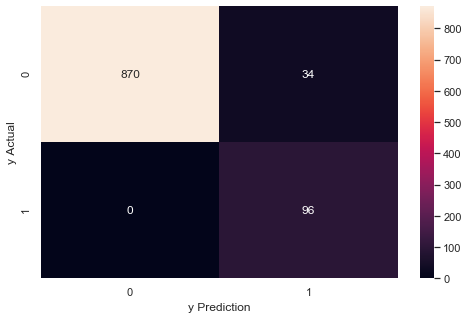

In [199]:
f, ax = plt.subplots(figsize=(8, 5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='.0f', ax=ax)
plt.xlabel('y Prediction')
plt.ylabel('y Actual');

The resulted seems way too good as there are zero False Negative. This means, the data seems way too good, so keep in mind that this model focused on reducing the chances classify people who does not match with criteria from our dataset.

This does not mean when Thera Bank offer the loan to people with matched criteria, those people will 100% accepted it. There will be always X factor which we can predict like the willingness of the loan accepter, for example, or other consideration and priorities they have at that time.

## 7. Model Evaluation

With this phase we are going to compare if the model could perform much better after hyperparameter tuning or not.

> ### 7.1 Before Hyperparameter Tuning

In [180]:
estimator=Pipeline([('preprocess',transformer),('balancing', RandomUnderSampler()),('model',RandomForestClassifier())])
estimator.fit(X_train,y_train)
recall_score(y_test,estimator.predict(X_test))

0.9791666666666666

> ### 7.2 After Hyperparameter Tuning

In hyperparameter tuning, we want to look if the model could be tuned to have a much better overall score. In this model, RandomizedSearchCV preferred than GridSearch as it does not quite taxing the laptop than Gridsearch process. 

However, it is recommended to try using GridSearch when your laptop is able to do so as it has more detailed process than RandomizedSearchCV.

In [54]:
hyperparam_space = {
    # 'model__n_estimators' : [50,75,100,150], # The parameter is ignored to keep the process to not taxing the laptop too much
    'model__min_samples_leaf': [1,5,10,15,20,50],
    'model__min_samples_split': [2,5,10,15,20,50],
    'model__max_depth': [2,3,4,5,6,7],
    'model__criterion': ['entropy','gini']
}

In [56]:
estimator=Pipeline([('preprocess',transformer),('balancing', RandomUnderSampler()),('model',RandomForestClassifier())])
skfold = StratifiedKFold(n_splits=5)

random_search=RandomizedSearchCV(
    estimator,
    param_distributions= hyperparam_space,
    scoring='recall',
    #n_jobs=1=-1, # n_jobs also ignored to keep the process not taxing the laptop that much
    )
random_search.fit(X_train,y_train)

RandomizedSearchCV(estimator=Pipeline(steps=[('preprocess',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('binary '
                                                                               'encoder',
                                                                               BinaryEncoder(),
                                                                               ['ZIP '
                                                                                'Code'])])),
                                             ('balancing',
                                              RandomUnderSampler()),
                                             ('model',
                                              RandomForestClassifier())]),
                   param_distributions={'model__criterion': ['entropy', 'gini'],
                                        'model__max_depth

In [207]:
random_search.best_params_

{'model__min_samples_split': 10,
 'model__min_samples_leaf': 5,
 'model__max_depth': 4,
 'model__criterion': 'entropy'}

In [208]:
random_search.best_score_

0.9713943950786055

In [210]:
random_search.best_estimator_.fit(X_train,y_train)
recall_score(y_test,random_search.best_estimator_.predict(X_test))

0.9895833333333334

> ### 7.3 Model Conclusion

Here are the models recall score result Before and After Hyperparamer Tuning
- Before Hyperparamater tuning: 
0.9791666666666666
- After Hyperparamater tuning: 0.9895833333333334

Thus, we will use the balanced random forest classifier after tuning.

In [202]:
y_pred = random_search.best_estimator_.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.85      0.92       904
           1       0.41      1.00      0.58        96

    accuracy                           0.86      1000
   macro avg       0.70      0.92      0.75      1000
weighted avg       0.94      0.86      0.88      1000



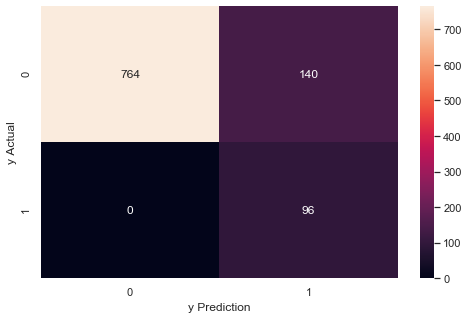

In [211]:
f, ax = plt.subplots(figsize=(8, 5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='.0f', ax=ax)
plt.xlabel('y Prediction')
plt.ylabel('y Actual');

As it can be seen, the True Negative cases decreased compared of previous model which results more False Negative Cases. This is a good news, as the model now able to identify people that is almost fit with criteria but probably will reject it.

We need to identify the causes of these people to decline the offers for better variables in next marketing campaign.

> ### 7.4 Feature Importance

In [ ]:
After we have found which model suits the best, we can continue to evaluate which feature that has no particular significance using feature importances.

In [184]:
estimator=Pipeline([('preprocess',transformer),('balancing', RandomUnderSampler()),('model',RandomForestClassifier())])
estimator.fit(X_train,y_train)
recall_score(y_test,random_search.best_estimator_.predict(X_test))

0.9895833333333334

In [186]:
d = {'Stats':transformer.get_feature_names(),'FI':random_search.best_estimator_[2].feature_importances_}
df = pd.DataFrame(d)

In [187]:
df

Stats        FI
0   binary encoder__ZIP Code_0  0.000000
1   binary encoder__ZIP Code_1  0.002303
2   binary encoder__ZIP Code_2  0.001021
3   binary encoder__ZIP Code_3  0.002989
4   binary encoder__ZIP Code_4  0.003317
5   binary encoder__ZIP Code_5  0.002230
6   binary encoder__ZIP Code_6  0.003864
7   binary encoder__ZIP Code_7  0.005690
8   binary encoder__ZIP Code_8  0.002166
9   binary encoder__ZIP Code_9  0.001344
10                  Experience  0.011689
11                      Income  0.453991
12                      Family  0.030026
13                       CCAvg  0.279120
14                   Education  0.102003
15                    Mortgage  0.028265
16          Securities Account  0.003080
17                  CD Account  0.057197
18                      Online  0.007337
19                  CreditCard  0.002366

Text(0.5, 0, 'Random Forest Feature Importance')

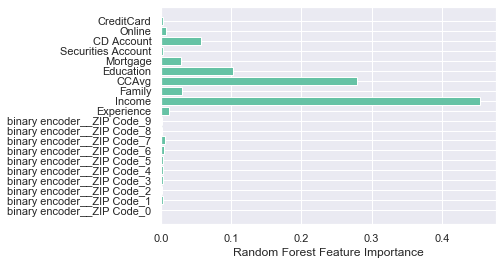

In [188]:
plt.barh(transformer.get_feature_names(), random_search.best_estimator_[2].feature_importances_)
plt.xlabel("Random Forest Feature Importance")

Based on the feature importance, we can see Income and CCAvg are two main nodes to divide in the decision tree model.

In [58]:
# Save the model

import pickle

estimator=Pipeline([('preprocess',transformer),('balancing', RandomOverSampler()),('model',RandomForestClassifier())])
model_final=random_search.best_estimator_.fit(X_train,y_train)

pickle.dump(model_final,open('FM_Loan_Classification.sav','wb'))

In [61]:
import joblib

estimator=Pipeline([('preprocess',transformer),('balancing', RandomOverSampler()),('model',RandomForestClassifier())])

model_final=random_search.best_estimator_.fit(X_train,y_train)

joblib.dump(model_final, "Joblib_Loan_Classification")

['Joblib_Loan_Classification']